<a href="https://colab.research.google.com/github/Jose-Luis25/EstadisticaVerano/blob/main/Practica02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Jose-Luis25/EstadisticaVerano/refs/heads/main/Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


Coeficiente de correlación:  0.9782

Coeficiente de determinación:  0.9570

Intervalo de confianza para b1 de  95%
 8674.1187 < b1 <  10225.8059

valor-p de Shapiro:  0.1952

valor_p de Breusch-Pagan:  0.5276

para x = 5, y = [72098.0155738]
           mean      mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  62648.053252  1184.640332   60221.427536   65074.678968  50545.457145   

   obs_ci_upper  
0   74750.64936  
para x = 9, y = [109897.86485962]
para x = 15, y = [166597.63878835]



,df,sum_sq,mean_sq,F,PR(>F)
YearsExperience,1.0,2.085685e+10,2.085685e+10,622.507203,1.143068e-20
Residual,28.0,9.381286e+08,3.350459e+07,NaN,NaN


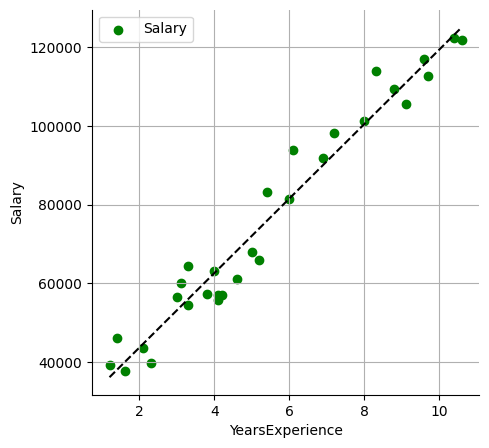

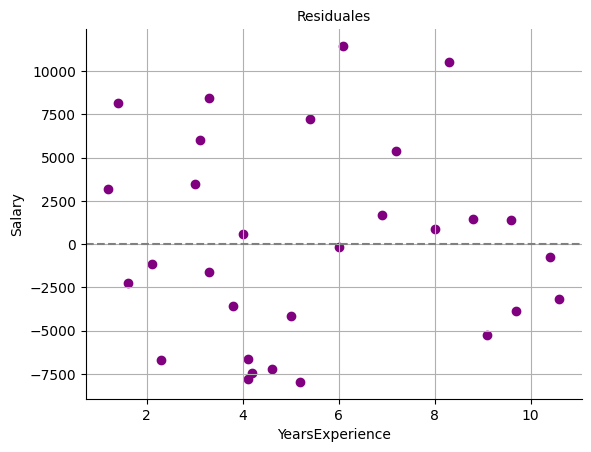

In [4]:
x = df["YearsExperience"]
y = df["Salary"]


#2 Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(x, y, label = "Salary", color = 'green')
plt.xlabel("YearsExperience") # nombrar eje x
plt.ylabel("Salary") # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)
plt.legend()#APARECE LO QUE INDICA EL PUNTO
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA

#3¿Los datos soportan la suposición de linealidad?

#SI

#4 Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')



# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

plt.plot(x, yc, color = 'black', linestyle = '--')



# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')



# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.title("Residuales", fontsize = 10)
plt.scatter(x, residuales, color = 'purple')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid()#APARECEN LOS CUADRITOS EN LA TABLA


# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')



# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# 11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno

print(f'para x = 5, y = {modelo.predict([1, 5])}')
print(modelo.get_prediction([1, 4]).summary_frame(alpha = 0.05))
print(f'para x = 9, y = {modelo.predict([1, 9])}')
print(f'para x = 15, y = {modelo.predict([1, 15])}\n')


# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("Salary ~ YearsExperience", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

#CONCLUSION
#SOPORTA LA SUPOSICION DE LINEALIDAD
#HAY HOMOSCEDASTICIDAD
#NORMALIDAD EN LOS RECIDUALES (LOS PUNTOS ESTAN CERCA DE LA LINEA)
#LA RELACION ES FUERTE DE CORRELACION YA QUE ES 0.97
#EL MODELO ES CONFIABLE PARA INTERPOLACION